In [1]:
import pandas as pd
import json
import re

In [2]:
primary_data = pd.read_csv('primary_data.csv')

with open("variable_mapping.json", "r") as json_file:
    variable_mapping = json.load(json_file)

In [3]:
display(primary_data)

,cpsc_case_number,narrative,treatment_date,age,sex,race,other_race,hispanic,diagnosis,other_diagnosis,...,body_part,body_part_2,disposition,location,fire_involvement,alcohol,drug,product_1,product_2,product_3
0,190103269,94YOM FELL TO THE FLOOR AT THE NURSING HOME ON...,2019-01-01,94,1,0,NaN,0,62,NaN,...,75,NaN,4,5,0,0,0,1807,0,0
1,190103270,86YOM FELL IN THE SHOWER AT HOME AND SUSTAINED...,2019-01-01,86,1,0,NaN,0,62,NaN,...,75,NaN,4,1,0,0,0,611,0,0
2,190103273,87YOF WAS GETTING UP FROM THE COUCH AND FELL T...,2019-01-01,87,2,0,NaN,0,53,NaN,...,32,NaN,4,1,0,0,0,679,1807,0
3,190103291,67YOF WAS AT A FRIENDS HOUSE AND SLIPPED ON WA...,2019-01-01,67,2,0,NaN,0,57,NaN,...,33,NaN,1,1,0,0,0,1807,0,0
4,190103294,70YOF WAS STANDING ON A STEP STOOL AND FELL OF...,2019-01-01,70,2,0,NaN,0,57,NaN,...,33,NaN,1,1,0,0,0,620,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115123,230217170,81 YOM FELL OUT OF BED. DX: LEFT FEMUR FRACTURE.,2022-10-22,81,1,1,NaN,2,57,NaN,...,81,NaN,4,1,0,0,0,4076,0,0
115124,230217171,"72 YOF SLIPPED AND FELL ON THE FLOOR. DX: L-3,...",2022-10-22,72,2,1,NaN,2,57,NaN,...,79,31.0,4,0,0,0,0,1807,0,0
115125,230217174,90 YOF TRIPPED AND FELL ON A GARAGE FLOOR. DX:...,2022-10-22,90,2,1,NaN,2,64,NaN,...,30,NaN,1,1,0,0,0,1807,0,0
115126,230218390,77 YOM PRESENTS FROM NURSING HOME FOLLOWING UN...,2022-10-24,77,1,1,NaN,2,62,NaN,...,75,75.0,1,5,0,0,0,1807,0,0


In [4]:
for key, value in variable_mapping.items():
    print(f"{key}: {value}")

sex: {'0': 'UNKNOWN', '1': 'MALE', '2': 'FEMALE', '3': 'NON-BINARY/OTHER'}
race: {'0': 'N.S.', '1': 'WHITE', '2': 'BLACK/AFRICAN AMERICAN', '3': 'OTHER', '4': 'ASIAN', '5': 'AMERICAN INDIAN/ALASKA NATIVE', '6': 'NATIVE HAWAIIAN/PACIFIC ISLANDER'}
hispanic: {'0': 'Unk/Not stated', '1': 'Yes', '2': 'No'}
alcohol: {'0': 'No/Unk', '1': 'Yes'}
drug: {'0': 'No/Unk', '1': 'Yes'}
body_part: {'0': '0 - INTERNAL', '30': '30 - SHOULDER', '31': '31 - UPPER TRUNK', '32': '32 - ELBOW', '33': '33 - LOWER ARM', '34': '34 - WRIST', '35': '35 - KNEE', '36': '36 - LOWER LEG', '37': '37 - ANKLE', '38': '38 - PUBIC REGION', '75': '75 - HEAD', '76': '76 - FACE', '77': '77 - EYEBALL', '78': '78 - UPPER TRUNK(OLD)', '79': '79 - LOWER TRUNK', '80': '80 - UPPER ARM', '81': '81 - UPPER LEG', '82': '82 - HAND', '83': '83 - FOOT', '84': '84 - 25-50% OF BODY', '85': '85 - ALL PARTS BODY', '86': '86 - OTHER(OLD)', '87': '87 - NOT STATED/UNK', '88': '88 - MOUTH', '89': '89 - NECK', '90': '90 - LOWER ARM(OLD)', '91': 

In [5]:
# Regular expression pattern to match age at the start of the sentence
age_pattern = re.compile(r'^\d+\s*[Yy](ears )?[Oo](ld)?\s*[MmFf]?[ ,]*')

# Remove ages from each sentence in the 'narrative' column
primary_data['cleaned_narrative'] = primary_data['narrative'].apply(lambda x: age_pattern.sub('', x))


def remove_specific_words(text):
    # Define a regular expression pattern to match variations of "fall," "sustained," "dx," and "s/p"
    pattern = r'\b(?:fall|falls|falling|fell|sustained|dx|s/p)\b'

    # Use re.sub() to replace the matched patterns with an empty string
    cleaned_text = re.sub(pattern, '', text, flags=re.IGNORECASE)

    return cleaned_text

    # Apply the function to the "narrative" column
primary_data['cleaned_narrative'] = primary_data['cleaned_narrative'].apply(remove_specific_words)

product_columns = ['product_1', 'product_2', 'product_3', 'diagnosis']
for column in product_columns:
  if column in variable_mapping:
    print(primary_data[column])
    primary_data[column] = primary_data[column].apply(lambda x: variable_mapping[column].get(str(x), "Unknown"))


# Print the cleaned sentences
print(primary_data[['cleaned_narrative', 'product_1', 'diagnosis']].head(20))


0         1807
1          611
2          679
3         1807
4          620
          ... 
115123    4076
115124    1807
115125    1807
115126    1807
115127    4074
Name: product_1, Length: 115128, dtype: int64
0            0
1            0
2         1807
3            0
4            0
          ... 
115123       0
115124       0
115125       0
115126       0
115127       0
Name: product_2, Length: 115128, dtype: int64
0         0
1         0
2         0
3         0
4         0
         ..
115123    0
115124    0
115125    0
115126    0
115127    0
Name: product_3, Length: 115128, dtype: int64
0         62
1         62
2         53
3         57
4         57
          ..
115123    57
115124    57
115125    64
115126    62
115127    64
Name: diagnosis, Length: 115128, dtype: int64
                                    cleaned_narrative  \
0    TO THE FLOOR AT THE NURSING HOME ONTO BACK OF...   
1     IN THE SHOWER AT HOME AND  A CLOSED HEAD INJURY   
2   WAS GETTING UP FROM THE COUCH AND  T

In [6]:
#wq narrative preprocessing: using lemmatization
#using lemmatization instead of stemming for more accurate word reduction (stemming causes it to lose original meaning)
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd
nltk.download('omw-1.4')

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Create a translation table to remove punctuation in string
translator = str.maketrans('', '', string.punctuation)
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to preprocess each observation
def preprocessing(text):
    words = word_tokenize(text.lower())
    punc_words = [word.translate(translator) for word in words]

    filtered_words = [word for word in punc_words if word not in stop_words]
    # Reduce words to their base or root form using lemmatization
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    return ' '.join(lemmatized_words)  # Join words with spacing

# Assuming you have a DataFrame named primary_data and a 'narrative' column
primary_data['trying new narrative'] = primary_data['cleaned_narrative'].apply(preprocessing)
pd.set_option('display.max_colwidth', None)
display(primary_data['trying new narrative'])



[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ferwy\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ferwy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ferwy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ferwy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0                                                               floor nursing home onto back head subdural hematoma
1                                                                                    shower home closed head injury
2                                                    getting couch floor abrasion elbow admitted hemorrhagic stroke
3                                                                  friend house slipped water floor right radius fx
4                                                                               standing step stool right radius fx
                                                            ...                                                    
115123                                                                                   bed   left femur fracture 
115124                                                     slipped floor   l3  l4 fracture  right rib fracture x 3 
115125                                                                 t

In [7]:
age_bins = pd.cut(primary_data.age,bins=[64,70,75,80,85,90,95,100,105,110,115,120],labels=['65-70','71-75','76-80','81-85','86-90','91-95','96-100','101-105','106-110','111-115','116-120'])
primary_data.insert(5,'age_group',age_bins)

In [8]:
!pip install sentence-transformers

from sentence_transformers import SentenceTransformer

# Load a pre-trained model (e.g., 'paraphrase-MiniLM-L6-v2')
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

In [9]:
narratives = primary_data['trying new narrative']

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(narratives)

C:\Users\ferwy\anaconda3\envs\py39\lib\site-packages\sklearn\cluster\_kmeans.py:1848: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\ferwy\anaconda3\envs\py39\lib\site-packages\sklearn\cluster\_kmeans.py:1848: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\ferwy\anaconda3\envs\py39\lib\site-packages\sklearn\cluster\_kmeans.py:1848: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THRE

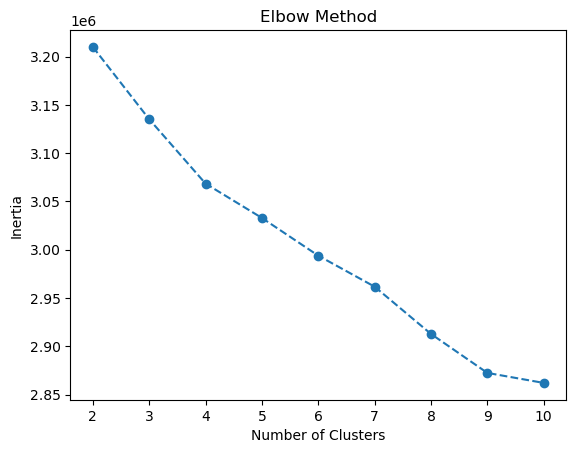

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
inertia_values = []

# Assuming you have sentence_embeddings containing your sentence embeddings

for k in range(2, 11):
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=100)
    kmeans.fit(embeddings)  # Use sentence embeddings instead of tfidf_matrix
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method graph to select the optimal number of clusters
plt.plot(range(2, 11), inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [11]:
#biggest dip - 3 clusters
optimal_num_clusters =3
kmeans = MiniBatchKMeans(n_clusters=optimal_num_clusters, random_state=42,batch_size=100)
primary_data['cluster'] = kmeans.fit_predict(embeddings)
# Print the clustering results
print(primary_data[['trying new narrative', 'cluster']])

C:\Users\ferwy\anaconda3\envs\py39\lib\site-packages\sklearn\cluster\_kmeans.py:1848: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


                                                                                             trying new narrative  \
0                                                             floor nursing home onto back head subdural hematoma   
1                                                                                  shower home closed head injury   
2                                                  getting couch floor abrasion elbow admitted hemorrhagic stroke   
3                                                                friend house slipped water floor right radius fx   
4                                                                             standing step stool right radius fx   
...                                                                                                           ...   
115123                                                                                 bed   left femur fracture    
115124                                                   slipped

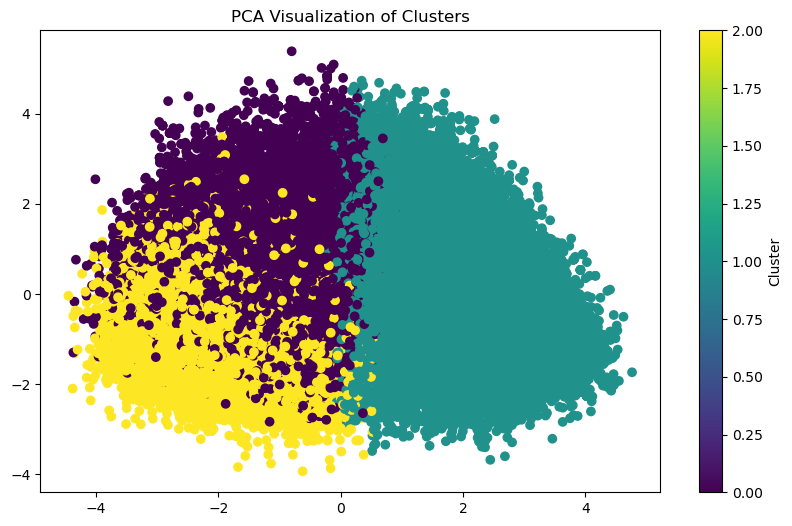

In [12]:
from sklearn.decomposition import PCA

# Reduce dimensionality with PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Visualize the reduced data with cluster labels
plt.figure(figsize=(10, 6))
scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=primary_data['cluster'], cmap='viridis')
plt.title('PCA Visualization of Clusters')
plt.colorbar(scatter, label='Cluster')
plt.show()

Cluster 0 - Significant Words:
head: 23493
floor: 16765
pt: 13595
home: 9515
contusion: 8947
laceration: 8339
face: 8286
bed: 7914
hit: 7653
scalp: 7391


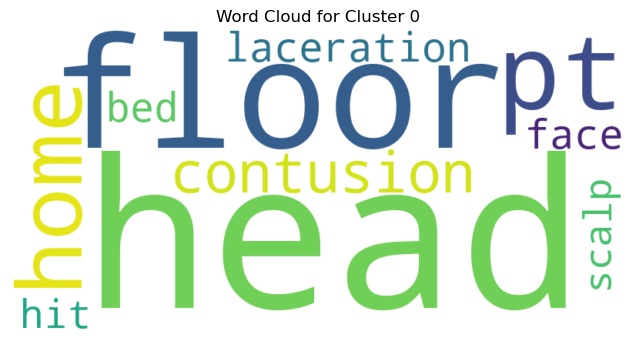

Cluster 1 - Significant Words:
floor: 20094
fracture: 19127
hip: 18030
left: 14051
right: 13812
fx: 13399
pain: 13364
home: 12180
pt: 10874
onto: 10142


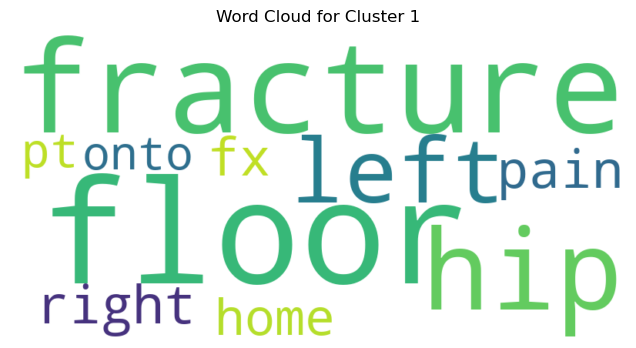

Cluster 2 - Significant Words:
head: 35482
injury: 17463
closed: 11127
floor: 10211
home: 5890
hit: 4609
laceration: 4582
onto: 3985
scalp: 3668
hitting: 3306


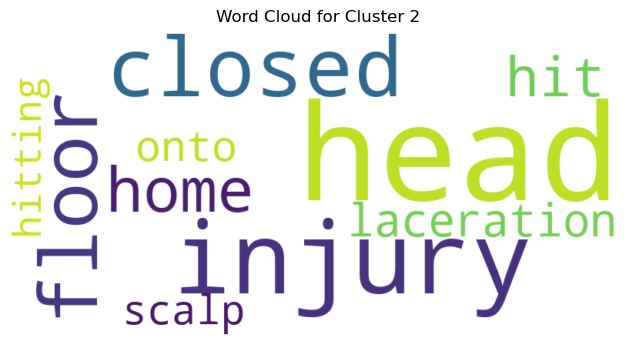

In [13]:
!pip install wordcloud
from collections import Counter
from wordcloud import WordCloud

# Tokenize and preprocess the sentences within each cluster
cluster_words = {}
for cluster_id in range(optimal_num_clusters):
    cluster_data = primary_data[primary_data['cluster'] == cluster_id]
    cluster_narratives = cluster_data['trying new narrative'].tolist()

    cluster_words[cluster_id] = []
    for narrative in cluster_narratives:
        # Tokenize and preprocess each narrative
        words = word_tokenize(narrative.lower())
        stop_words = set(stopwords.words('english'))
        words = [word for word in words if word.isalnum() and word not in stop_words]
        cluster_words[cluster_id].extend(words)

# View significant words in each cluster
for cluster_id in range(optimal_num_clusters):
    significant_words = Counter(cluster_words[cluster_id]).most_common(10)  # Top 10 significant words
    print(f"Cluster {cluster_id} - Significant Words:")
    for word, freq in significant_words:
        print(f"{word}: {freq}")

    # Create a word cloud for the cluster
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(significant_words))
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Cluster {cluster_id}")
    plt.show()

In [14]:
#for ref: severity_mapping = {
# 'LEFT WITHOUT BEING SEEN':0,
# 'UNKNOWN, NOT STATED':0,
# 'NO INJURY':0,
# 'TREATED/EXAMINED AND RELEASED':2,
#  'TREATED AND TRANSFERRED':3,
# 'TREATED AND ADMITTED/HOSPITALIZED':4,
# 'HELD FOR OBSERVATION':5,
# 'FATALITY INCL. DOA, DIED IN ER':6
#  }

severity_mapping = {
6.0:0,
9.0:0,
0.0:0,
1.0:1,
2.0:2,
4.0:3,
5.0:4,
8.0:5
 }

primary_data['severity'] = primary_data['disposition'].map(severity_mapping)


In [15]:
for_labels = primary_data[['disposition', 'alcohol', 'fire_involvement', 'location', 'drug']]


for column in for_labels.columns:
  if column in variable_mapping:
    for_labels[column] = for_labels[column].apply(lambda x: variable_mapping[column].get(str(x), "Unknown"))

for_labels

C:\Users\ferwy\AppData\Local\Temp\ipykernel_24040\2314696035.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_labels[column] = for_labels[column].apply(lambda x: variable_mapping[column].get(str(x), "Unknown"))


,disposition,alcohol,fire_involvement,location,drug
0,4 - TREATED AND ADMITTED/HOSPITALIZED,No/Unk,NO/?,PUBLIC,No/Unk
1,4 - TREATED AND ADMITTED/HOSPITALIZED,No/Unk,NO/?,HOME,No/Unk
2,4 - TREATED AND ADMITTED/HOSPITALIZED,No/Unk,NO/?,HOME,No/Unk
3,1 - TREATED/EXAMINED AND RELEASED,No/Unk,NO/?,HOME,No/Unk
4,1 - TREATED/EXAMINED AND RELEASED,No/Unk,NO/?,HOME,No/Unk
...,...,...,...,...,...
115123,4 - TREATED AND ADMITTED/HOSPITALIZED,No/Unk,NO/?,HOME,No/Unk
115124,4 - TREATED AND ADMITTED/HOSPITALIZED,No/Unk,NO/?,UNK,No/Unk
115125,1 - TREATED/EXAMINED AND RELEASED,No/Unk,NO/?,HOME,No/Unk
115126,1 - TREATED/EXAMINED AND RELEASED,No/Unk,NO/?,PUBLIC,No/Unk


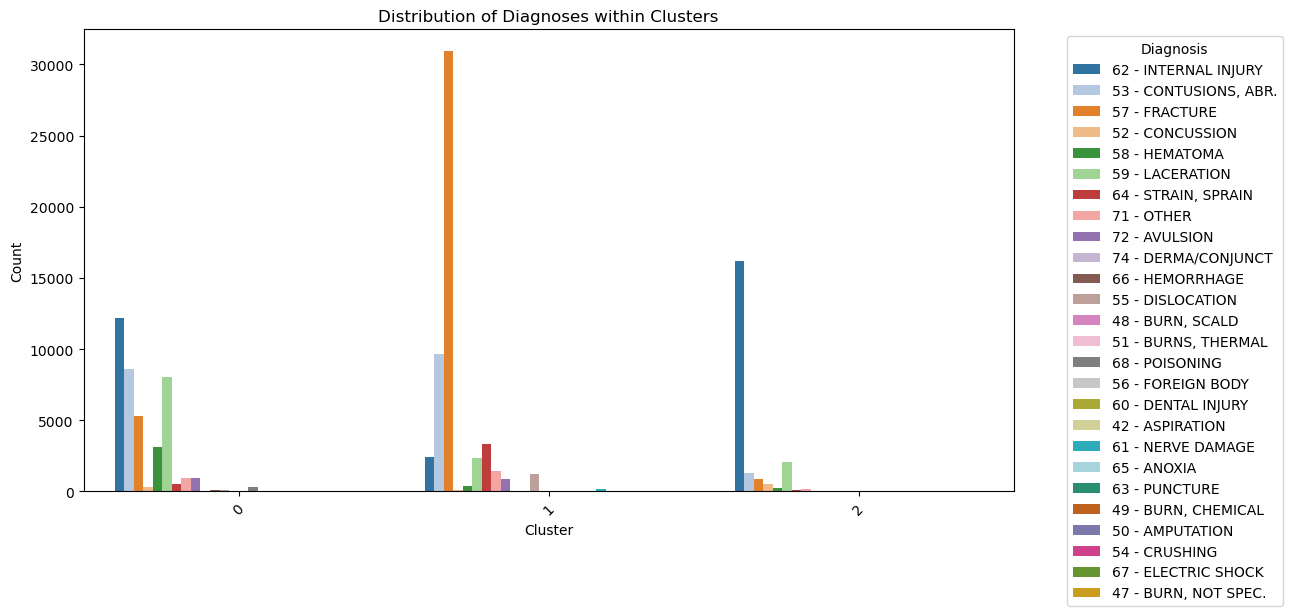

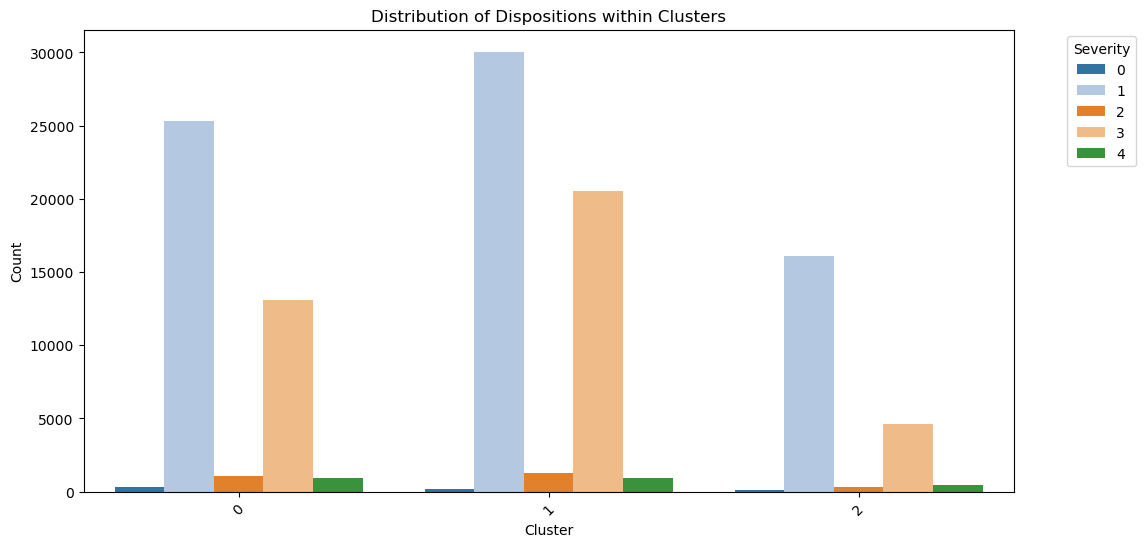

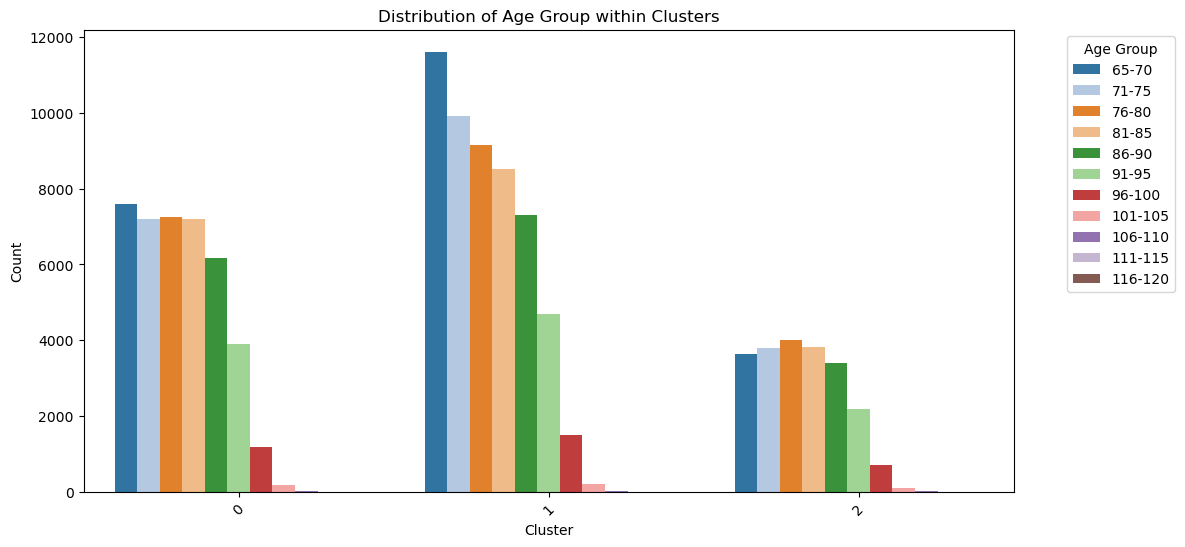

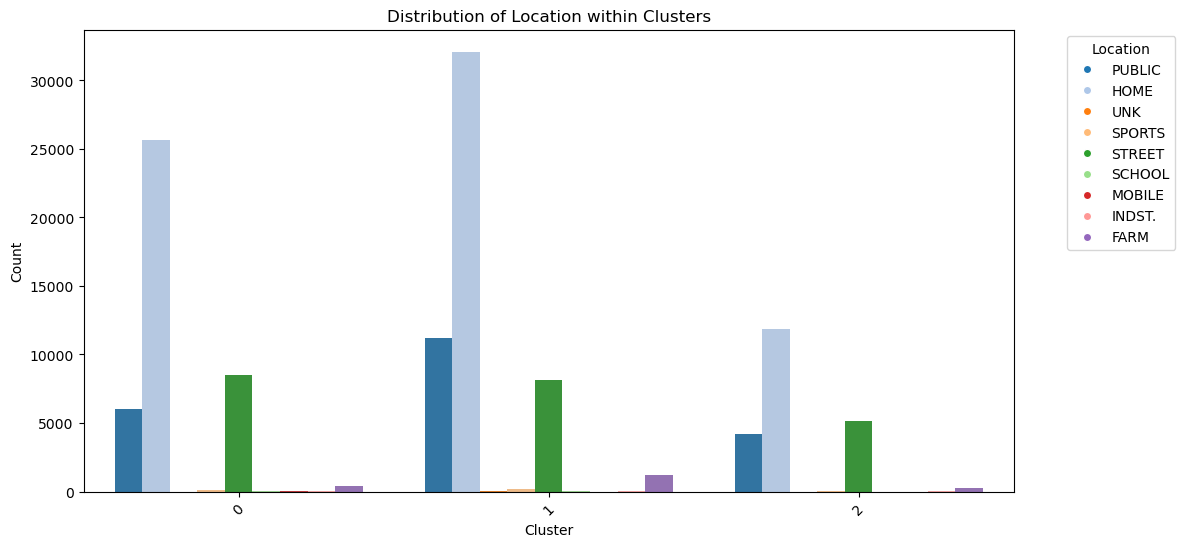

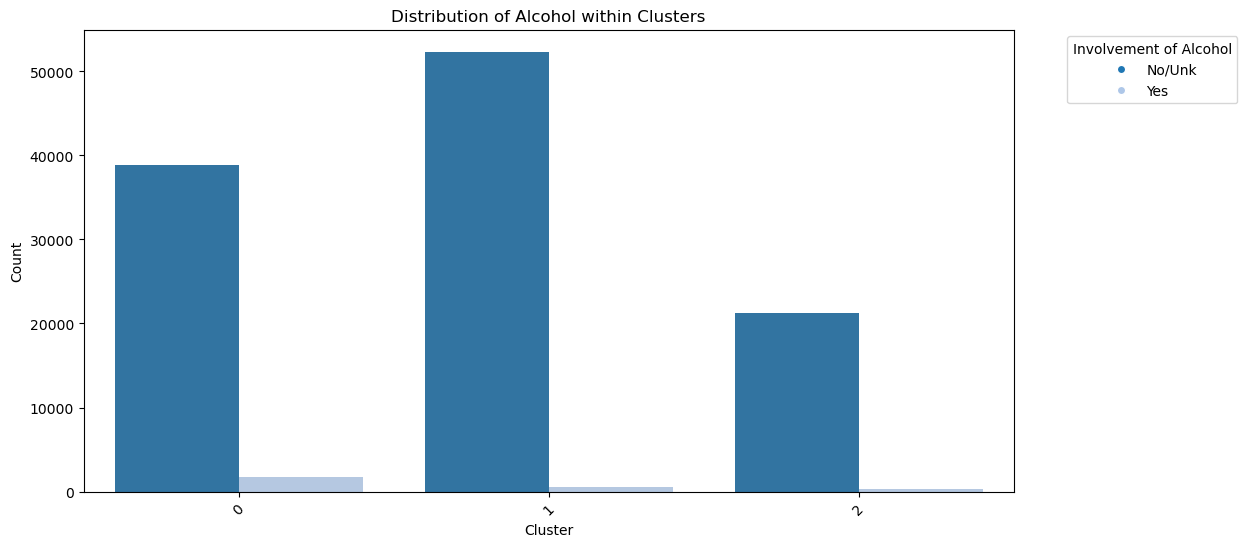

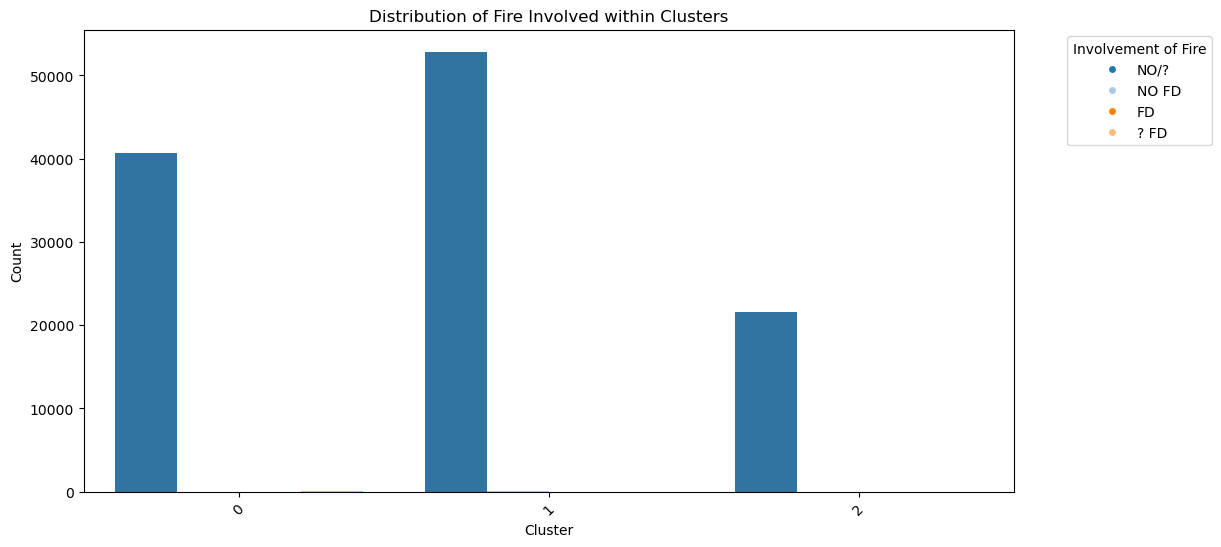

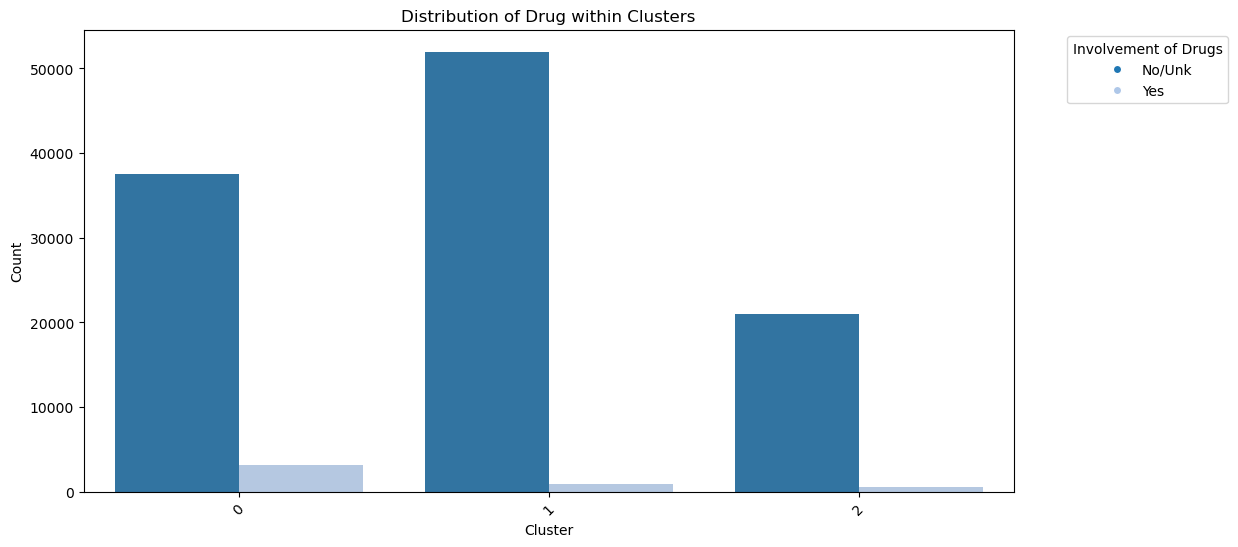

In [16]:
import seaborn as sns

# Create a countplot to visualize the distribution of diagnoses within clusters
custom_palette = [
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c", "#98df8a",
    "#d62728", "#ff9896", "#9467bd", "#c5b0d5", "#8c564b", "#c49c94",
    "#e377c2", "#f7b6d2", "#7f7f7f", "#c7c7c7", "#bcbd22", "#dbdb8d",
    "#17becf", "#9edae5", "#1b9e77", "#d95f02", "#7570b3", "#e7298a",
    "#66a61e", "#e6ab02", "#a6761d", "#666666", "#a6cee3", "#1f78b4"
]

# Create a countplot to visualize the distribution of diagnoses within clusters
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=primary_data, x='cluster', hue='diagnosis', palette=custom_palette)
plt.title('Distribution of Diagnoses within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Diagnosis', bbox_to_anchor=(1.05, 1), loc='upper left')

# Get the top 3 most frequent diagnoses in each cluster
top_diagnoses = primary_data.groupby('cluster')['diagnosis'].value_counts().groupby(level=0).head(3).index.get_level_values(1)

# Annotate only the bars corresponding to the top 3 diagnoses in each cluster
for i, p in enumerate(ax.patches):
    cluster_index = i % len(top_diagnoses)  # Calculate the cluster index
    diagnosis = top_diagnoses[cluster_index]  # Get the diagnosis for the current bar
    if p.get_height() > 0 and p.get_label() == diagnosis:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Create a bar chart to visualize the distribution of dispositions within each cluster
plt.figure(figsize=(12, 6))
sns.countplot(data=primary_data, x='cluster', hue='severity', palette=custom_palette)
plt.title('Distribution of Dispositions within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')

# Create a bar chart to visualize the distribution of age group within each cluster
plt.figure(figsize=(12, 6))
sns.countplot(data=primary_data, x='cluster', hue='age_group', palette=custom_palette)
plt.title('Distribution of Age Group within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')


unique_loc_values = for_labels['location'].unique()

# Create a custom legend with labels from unique_loc_values and custom_palette
custom_legend = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color)
                 for idx, (label, color) in enumerate(zip(unique_loc_values, custom_palette))]

# Create a bar chart to visualize the distribution of Location within each cluster
plt.figure(figsize=(12, 6))
ax1 = sns.countplot(data=primary_data, x='cluster', hue='location', palette=custom_palette)
plt.title('Distribution of Location within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(handles=custom_legend, title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')




unique_alc_values = for_labels['alcohol'].unique()

# Create a custom legend with labels from unique_loc_values and custom_palette
custom_legend = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color)
                 for idx, (label, color) in enumerate(zip(unique_alc_values, custom_palette))]

# Create a bar chart to visualize the distribution of alcohol within each cluster
plt.figure(figsize=(12, 6))
sns.countplot(data=primary_data, x='cluster', hue='alcohol', palette=custom_palette)
plt.title('Distribution of Alcohol within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Involvement of Alcohol',handles=custom_legend, bbox_to_anchor=(1.05, 1), loc='upper left' )

unique_fire_values = for_labels['fire_involvement'].unique()

# Create a custom legend with labels from unique_loc_values and custom_palette
custom_legend = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color)
                 for idx, (label, color) in enumerate(zip(unique_fire_values, custom_palette))]

# Create a bar chart to visualize the distribution of fire involved within each cluster
plt.figure(figsize=(12, 6))
sns.countplot(data=primary_data, x='cluster', hue='fire_involvement', palette=custom_palette)
plt.title('Distribution of Fire Involved within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Involvement of Fire', handles=custom_legend,bbox_to_anchor=(1.05, 1), loc='upper left')

unique_drug_values = for_labels['drug'].unique()

# Create a custom legend with labels from unique_loc_values and custom_palette
custom_legend = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color)
                 for idx, (label, color) in enumerate(zip(unique_drug_values, custom_palette))]


# Create a bar chart to visualize the distribution of drug within each cluster
plt.figure(figsize=(12, 6))
sns.countplot(data=primary_data, x='cluster', hue='drug', palette=custom_palette)
plt.title('Distribution of Drug within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Involvement of Drugs',handles=custom_legend, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [17]:
# Count the occurrences of all products within each cluster
product_counts = primary_data.groupby(['cluster', 'product_1']).size().reset_index(name = 'count')

# Sort the products by count within each cluster in descending order
product_counts['rank'] = product_counts.groupby('cluster')['count'].rank(ascending=False, method='first')

# Filter the top 3 products for each cluster
top_3_products = product_counts[product_counts['rank'] <= 3]

# Print or use the 'top_3_products' DataFrame
print(top_3_products)

      cluster                                         product_1  count  rank
126         0               1807 - FLOORS OR FLOORING MATERIALS  11525   1.0
136         0                            1842 - STAIRS OR STEPS   3446   3.0
253         0  4076 - BEDS OR BEDFRAMES, OTHER OR NOT SPECIFIED   6267   2.0
557         1               1807 - FLOORS OR FLOORING MATERIALS  14394   1.0
568         1                            1842 - STAIRS OR STEPS   8363   2.0
688         1  4076 - BEDS OR BEDFRAMES, OTHER OR NOT SPECIFIED   5355   3.0
935         2               1807 - FLOORS OR FLOORING MATERIALS   7285   1.0
1040        2             4074 - CHAIRS, OTHER OR NOT SPECIFIED   1551   3.0
1042        2  4076 - BEDS OR BEDFRAMES, OTHER OR NOT SPECIFIED   2838   2.0
